In [1]:
import yfinance as yf
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Define the stock symbol and the time range for historical data
stock_symbol = 'AAPL'  # Apple Inc. as an example
start_date = '2017-01-01'
end_date = '2023-10-31'

# Fetch historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

test_start = '2023-11-01'
test_end = '2023-11-20'
test = yf.download(stock_symbol, start=end_date, end=test_end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
type(stock_data)

pandas.core.frame.DataFrame

In [9]:
stock_data.to_csv('train.csv')
test.to_csv('test.csv')

In [10]:
stock_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


stock_data.set_index("Date", inplace=True)
stock_data.sort_index(inplace=True)

test_data.set_index("Date", inplace=True)
test_data.sort_index(inplace=True)

In [11]:
len(stock_data)

1718

In [12]:
stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
print(f'Index type of stock dataframe: {type(stock_data.index)}\nName of index: {stock_data.index.name}')

Index type of stock dataframe: <class 'pandas.core.indexes.base.Index'>
Name of index: Date


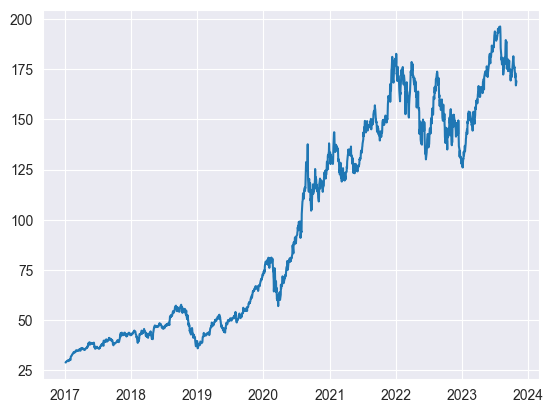

In [3]:
plt.plot(stock_data.index, stock_data.Open)

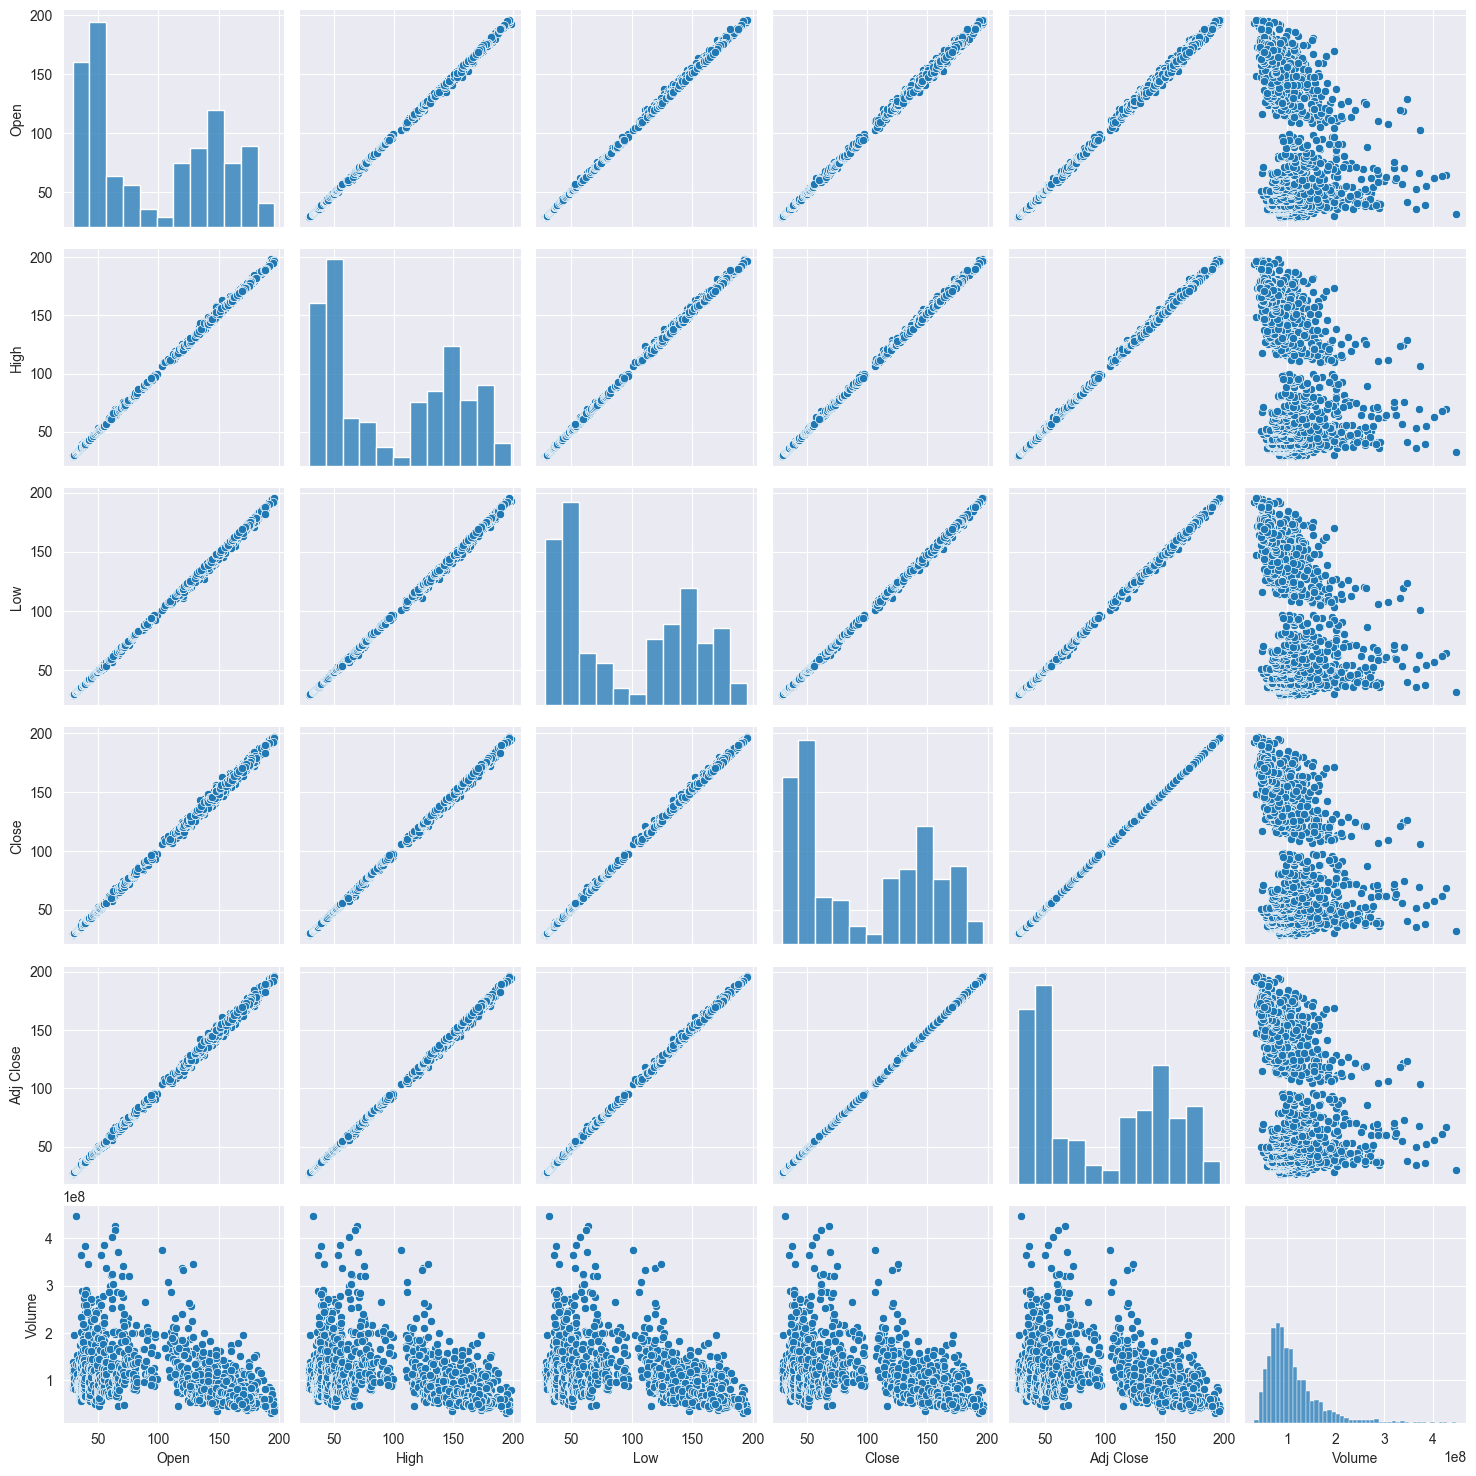

In [4]:
sns.pairplot(stock_data[stock_data.columns])

It seems that attributes open, high, low, close, adj close have high correlation

<Axes: >

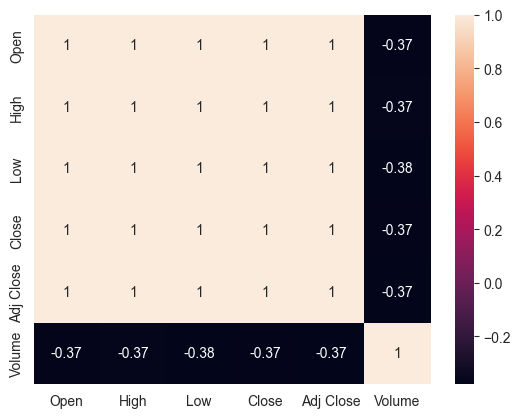

In [5]:
sns.heatmap(stock_data.corr(), annot=True)

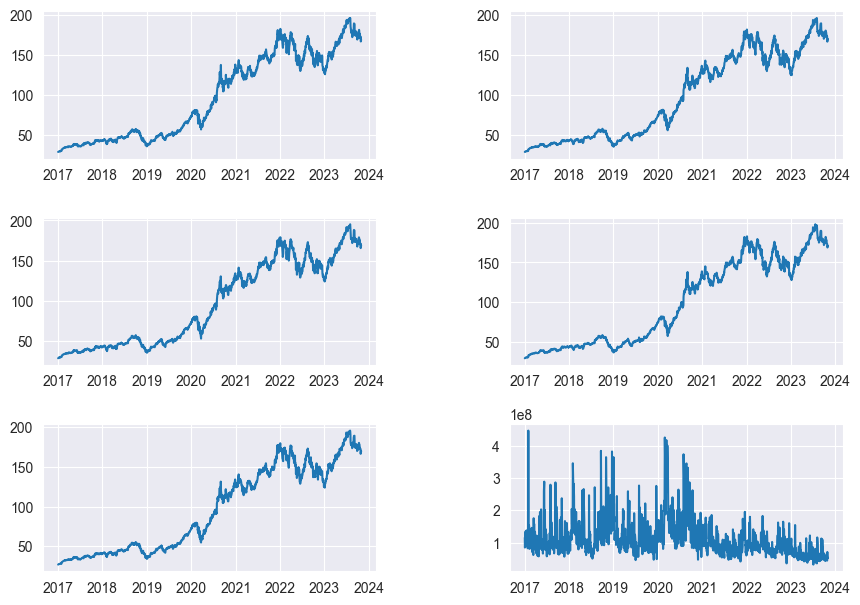

In [6]:
plt.figure(figsize=(10,7))

plt.subplot(3, 2, 1)
plt.plot(stock_data.index, stock_data.Open)

plt.subplot(3, 2, 2)
plt.plot(stock_data.index, stock_data.Close)

plt.subplot(3, 2, 3)
plt.plot(stock_data.index, stock_data.Low)

plt.subplot(3, 2, 4)
plt.plot(stock_data.index, stock_data.High)

plt.subplot(3, 2, 5)
plt.plot(stock_data.index, stock_data['Adj Close'])

plt.subplot(3, 2, 6)
plt.plot(stock_data.index, stock_data.Volume)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## Moving average

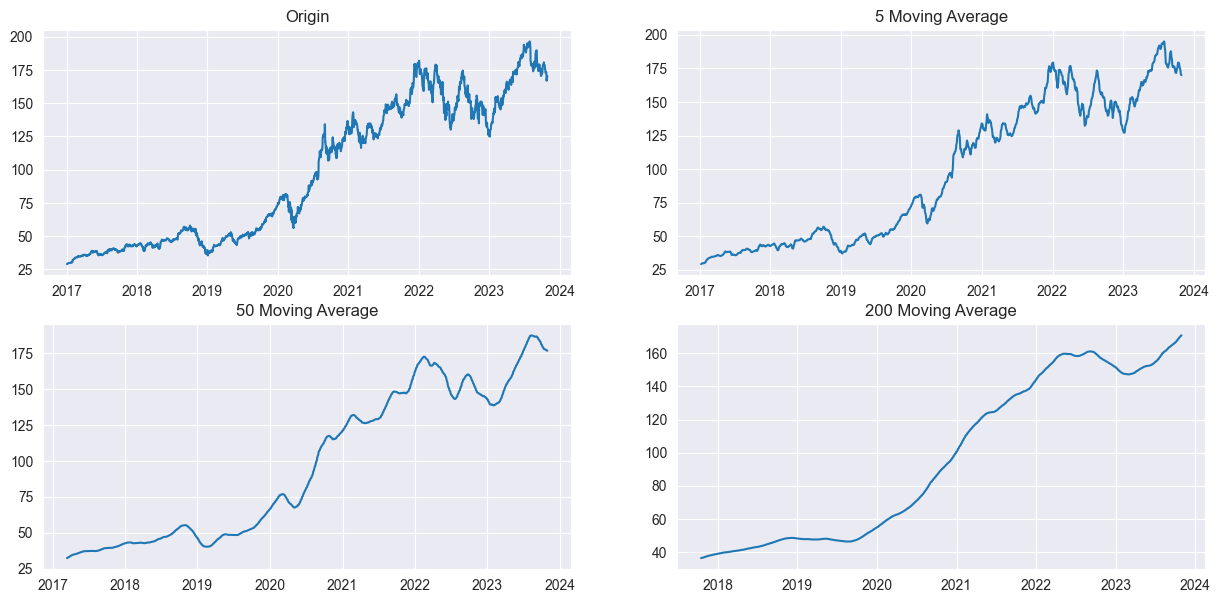

In [7]:
plt.figure(figsize=(15, 7))

ax = plt.subplot(2, 2, 1)
ax.set_title("Origin")
plt.plot(stock_data['Close'])


ax = plt.subplot(2, 2, 2)
ax.set_title("5 Moving Average")
plt.plot(stock_data['Close'].rolling(5).mean())


ax = plt.subplot(2, 2, 3)
ax.set_title("50 Moving Average")
plt.plot(stock_data['Close'].rolling(50).mean())


ax = plt.subplot(2, 2, 4)
ax.set_title("200 Moving Average")
plt.plot(stock_data['Close'].rolling(200).mean())


## Exponential Moving Average

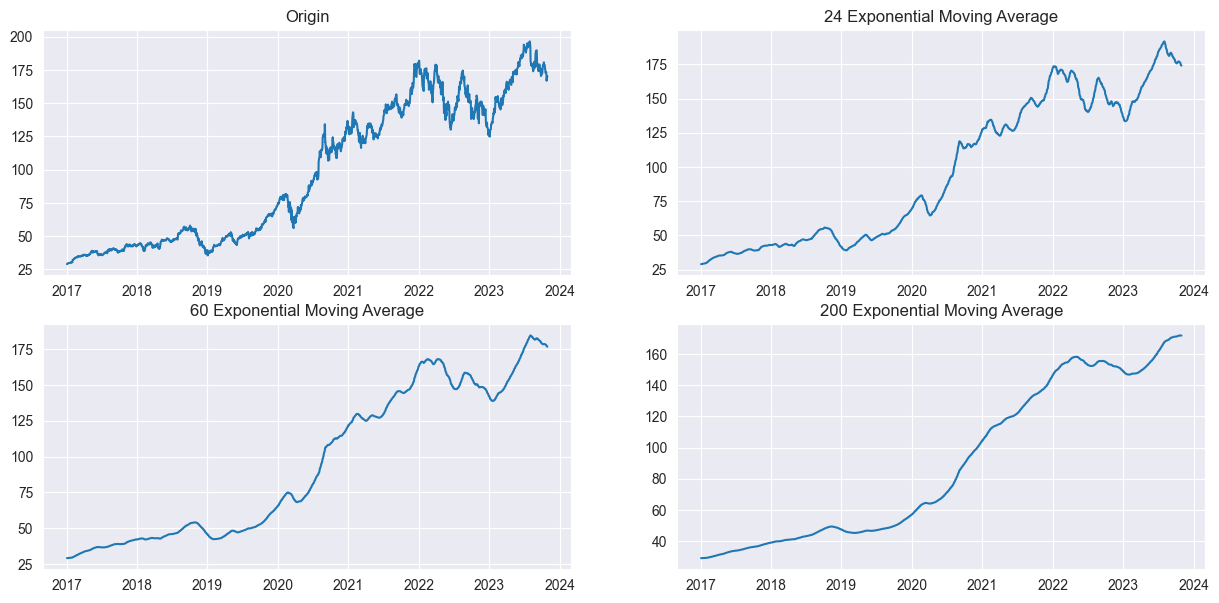

In [8]:
plt.figure(figsize=(15, 7))

ax = plt.subplot(2, 2, 1)
ax.set_title("Origin")
plt.plot(stock_data['Close'])


ax = plt.subplot(2, 2, 2)
ax.set_title("24 Exponential Moving Average")
plt.plot(stock_data['Close'].ewm(span=24, adjust=False).mean())


ax = plt.subplot(2, 2, 3)
ax.set_title("60 Exponential Moving Average")
plt.plot(stock_data['Close'].ewm(span=60, adjust=False).mean())


ax = plt.subplot(2, 2, 4)
ax.set_title("200 Exponential Moving Average")
plt.plot(stock_data['Close'].ewm(span=200, adjust=False).mean())


## Cumulative Moving Average

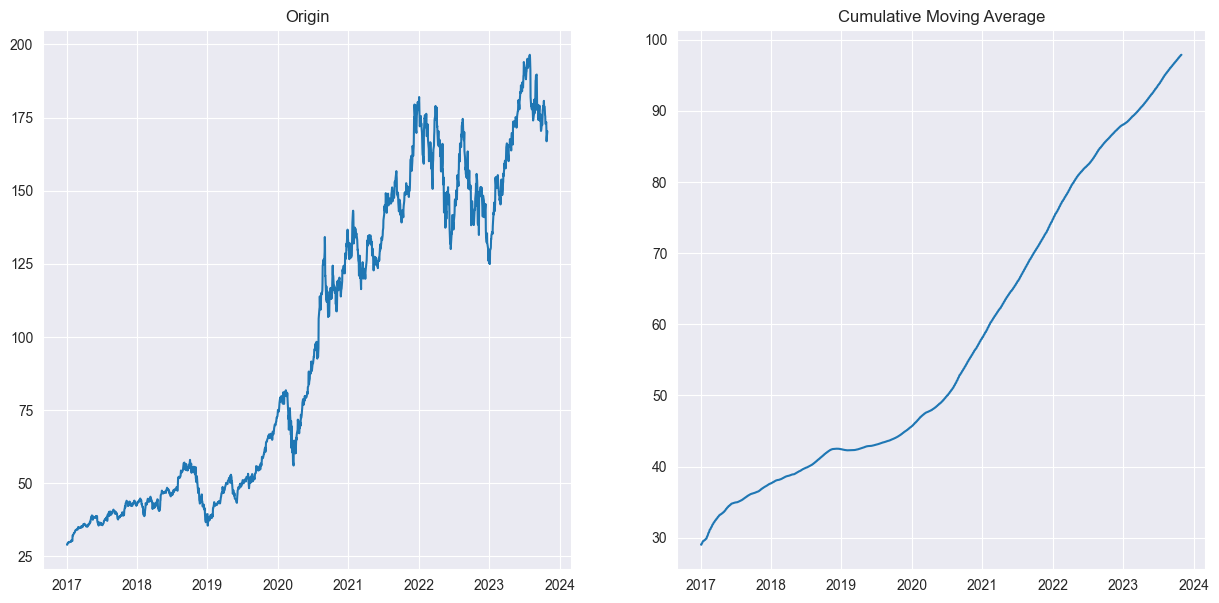

In [9]:
plt.figure(figsize=(15, 7))

ax = plt.subplot(1, 2, 1)
ax.set_title("Origin")
plt.plot(stock_data['Close'])


ax = plt.subplot(1, 2, 2)
ax.set_title("Cumulative Moving Average")
plt.plot(stock_data['Close'].expanding().mean())